In [1]:
import tensorboard as tensorboard
import seaborn as seaborn
from tensorflow.python.client import device_lib
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import kr_helper_funcs as kr
print('tensorflow' + tf.__version__)
print('tensorboard' + tensorboard.__version__)
print('seaborn' + seaborn.__version__)
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')
device_lib.list_local_devices()

tensorflow2.1.0-dlenv_tfe
tensorboard2.1.1
seaborn0.10.0
Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2311518104001439093,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9922108893004709209
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2168844443427388853
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14728907981
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8760622599693612980
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [2]:
data_dir="../input/kaggle-catsdogs"
test_path= os.path.join(data_dir, 'test')

os.listdir(test_path)

['dogs', 'cats']

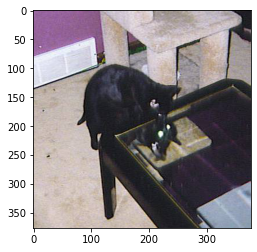

In [3]:
cat_image = test_path + '/cats/' + os.listdir(test_path + '/cats')[6]
imread(cat_image).shape
plt.imshow(imread(cat_image))

In [4]:
image_shape =(300, 300, 3)
test_gen = ImageDataGenerator(rescale =1./255)
batch_size=32
test_image_gen= test_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                               color_mode='rgb', batch_size=batch_size, 
                                               class_mode='binary',  shuffle=False)
test_image_gen.class_indices

Found 5000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [5]:
# help(test_gen.flow_from_directory)

In [6]:
model =tf.keras.models.load_model('catsdogs')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 69, 69, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
[0.6773739126205445, 0.5982092266082764, 0.5369308289051056, 0.49721043915748603, 0.4673807229995727, 0.4427423375368118, 0.4242748087644577, 0.4062017357826233, 0.39387915852069855, 0.3811830951452255, 0.3734685912847519, 0.3609814774274826, 0.3533108571529389, 0.3432192801713944, 0.3349912717819214, 0.33089332101345065, 0.32143005023002624, 0.3165169503569603, 0.3075870411396027, 0.3033384872913361, 0.2995713583230972, 0.290740448653698, 0.27978656511306765, 0.2746343347549439, 0.27728338783979417, 0.27028172906637193, 0.2681638311862945, 0.2575760325670242, 0.2515538825392723, 0.24919516099095346, 0.24701100215911864, 0.2390991036534309, 0.24111159519553185, 0.2316838778913021, 0.2339426237344742, 0.2244129252314568, 0.22179310542941091, 0.21844381147623065, 0.21558514132499693, 0.21113117790818212, 0.206767913126

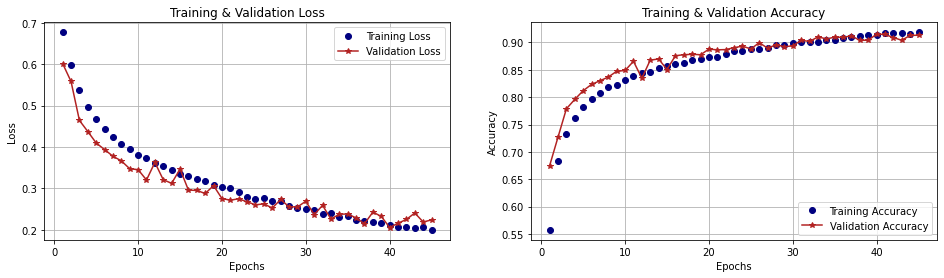

In [7]:
history = pd.read_csv("history_catsdogs.csv")
history_dict = history.to_dict('list')
kr.show_plots(history_dict)

In [8]:
pred = model.predict(test_image_gen)

In [9]:
predictions = pred > 0.5
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(test_image_gen.classes, predictions, target_names=test_image_gen.class_indices))

              precision    recall  f1-score   support

        cats       0.93      0.90      0.91      2500
        dogs       0.90      0.93      0.91      2500

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [10]:
pred

array([[1.9731329e-04],
       [2.0525556e-03],
       [1.6592275e-02],
       ...,
       [9.0971059e-01],
       [9.9999988e-01],
       [8.4369916e-01]], dtype=float32)

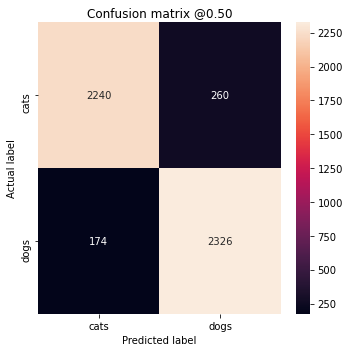

In [11]:

kr.plot_cm(test_image_gen.classes, predictions, test_image_gen.class_indices, 0.5)

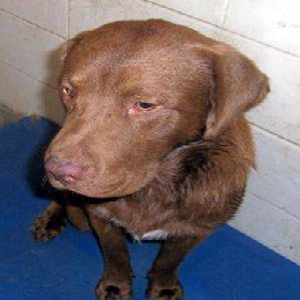

In [12]:
from tensorflow.keras.preprocessing import image
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[5]
# plt.imshow(imread(dog_image))
my_image = image.load_img(dog_image_path, target_size=image_shape)
my_image

In [13]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape
my_img_arr = np.expand_dims(my_img_arr, axis =0)
my_img_arr.shape

(1, 300, 300, 3)

In [14]:
model.predict(my_img_arr)

array([[1.]], dtype=float32)

In [15]:
model.input.shape

TensorShape([None, 300, 300, 3])

In [16]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (4, 4, 3, 32)
conv2d_1 (4, 4, 32, 32)
conv2d_2 (4, 4, 32, 64)


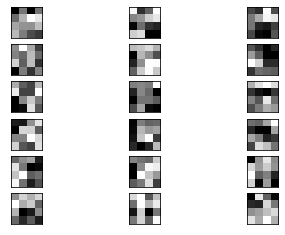

In [62]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

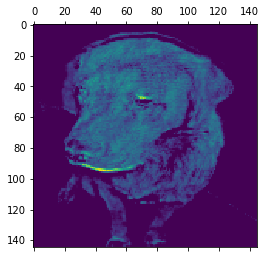

In [64]:
# from tensorflow.keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model.inputs, outputs=model.layers[2].output)

# returns a list of Numpy arrays: one array per layer activation
feature_maps  = activation_model.predict(my_img_arr)

# activation of the 1st convolution layer
first_layer_activation = feature_maps[0]

# # display the 4th channel of the activation of the 1st layer of the original model
plt.matshow(feature_maps[0, :, :, 1], cmap='viridis')

In [65]:
activation_model.summary()

Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 297, 297, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 145, 145, 32)      16416     
Total params: 17,984
Trainable params: 17,984
Non-trainable params: 0
_________________________________________________________________


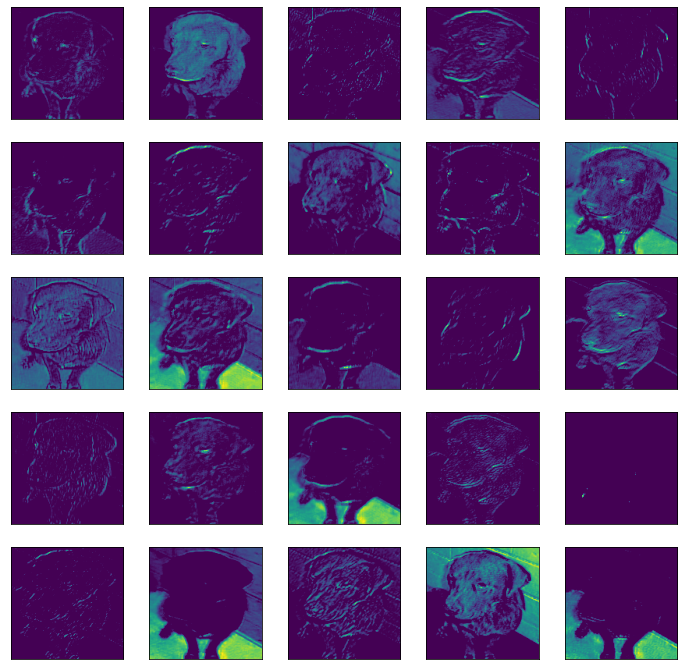

In [74]:

# plot all 64 maps in an 8x8 squares
square = 5
ix = 1
plt.figure(figsize=(12,12))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure

plt.show()

In [79]:
from keras.applications.imagenet_utils import decode_predictions 
resnet = tf.keras.applications.ResNet152()


Using TensorFlow backend.


[[('n02092002', 'Scottish_deerhound', 0.85339355), ('n02090622', 'borzoi', 0.047547158), ('n02093647', 'Bedlington_terrier', 0.014594307), ('n02109047', 'Great_Dane', 0.011536662), ('n02091244', 'Ibizan_hound', 0.010275118)]]
Predicted: Scottish_deerhound


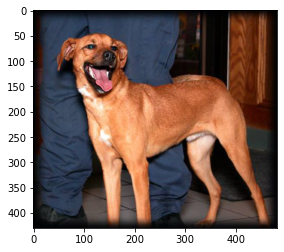

In [104]:
dog_image_path = test_path + '/dogs/' + os.listdir(test_path + '/dogs/')[2000]
# plt.imshow(imread(dog_image))
sample_image = image.load_img(dog_image_path, target_size=(224, 224, 3))
plt.imshow(imread(dog_image_path))
sample_img_arr = image.img_to_array(sample_image)
sample_img_arr = np.expand_dims(sample_img_arr, axis =0)
predictions = resnet.predict(sample_img_arr)
print(decode_predictions(predictions))
print('Predicted:', decode_predictions(predictions, top=3)[0][0][1])

In [113]:
sum(predictions[0])

0.999999925437659

In [84]:
help(decode_predictions)

Help on function wrapper in module keras.applications:

wrapper(*args, **kwargs)

